Practical 8: Implement MLP for classification of handwritten digits (MNIST Dataset)


In [32]:
#import libraries
import tensorflow as tf
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
%matplotlib notebook

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [34]:
#function for updating plots for each each epoch and error

def plt_dynamic (x,vy, ty, ax, colors=['b']):
    ax.plot (x, vy, 'b',label='Validation Loss')
    ax.plot(x,vy, 'r',label='Trin Loss')
    plt.legend()
    plt.grid()
    #fig.canvas.draw()

In [35]:
# [len(x) for x in mnist.load_data()]

In [36]:
#train and test data
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [37]:
X_train.shape

(60000, 28, 28)

In [38]:
y_train.shape

(60000,)

In [39]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [40]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [41]:
X_train=X_train.reshape(X_train.shape [0], X_train.shape [1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape [0],X_test.shape [1]*X_test.shape [2])

In [42]:
X_train.shape

(60000, 784)

In [43]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [44]:
#print('Number of Training Examples:', X_ train. shape [0], 'and each image is of shape (%d,%d)' %(X_train.shape[1]*X_train.shape[2]))
#print('Number of Test Examples:', X_test.shape[0], 'and each image is of shape (%d,%d)' %(X_test.shape[1],X_test.shape[2]))

print('Number of Training Examples:',X_train.shape [0], 'and each image is of shape (%d)' %(X_train.shape[1]))
print('Number of Test Examples:',X_test.shape [0], 'and each image is of shape (%d)' %(X_test.shape[1]))

Number of Training Examples: 60000 and each image is of shape (784)
Number of Test Examples: 10000 and each image is of shape (784)


In [45]:
#print('Number of Training Examples:', X_ train. shape [0], 'and each image is of shape (%d,%d)' %(X_train.shape[1]*X_train.shape[2]))
#print('Number of Test Examples:', X_test.shape[0], 'and each image is of shape (%d,%d)' %(X_test.shape[1],X_test.shape[2]))

print(f'Number of Training Examples: {X_train.shape [0]} and each image is of shape {X_train.shape[1]}')
# print('Number of Test Examples:',X_test.shape [0], 'and each image is of shape {}' (X_test.shape[1]))

Number of Training Examples: 60000 and each image is of shape 784


In [46]:
# example of data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [47]:
# normalize the data 
X_train=X_train/255
X_test=X_test/255

In [48]:
# example of data after normalization
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [49]:
# class number for each image
print('Class label of first image:',y_train[0])

# convert this into 10 decimal vector

Y_train=np_utils.to_categorical(y_train,10)
Y_test=np_utils.to_categorical(y_test,10)

print('After converting the output into a vector:',Y_train[0])

Class label of first image: 5
After converting the output into a vector: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [50]:
# build softmax classifier

from keras.models import Sequential 
from keras.layers import Dense, Activation

#model=Sequential([Dense(32, input_shape=(784,)),
#Activation('relu'),Dense(10),Activation('softmax')])

#model parameters
output_dim=10
input_dim=X_train.shape[1]

batch_size=128
nb_epoch=20

In [51]:
#start building model
#from keras.layers import Activation, Dense

model=Sequential()
#model.add(Dense(64))
#model.add(Activation('tanh'))
model.add(Dense(output_dim,input_dim=input_dim, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [52]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [53]:
60000/128

468.75

In [54]:
# Configure the learning process

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# train using fit()

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))



Epoch 1/20
469/469 [==============================] - 4s 5ms/step - loss: 1.3031 - accuracy: 0.6953 - val_loss: 0.8200 - val_accuracy: 0.8295
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.7214 - accuracy: 0.8403 - val_loss: 0.6126 - val_accuracy: 0.8580
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5904 - accuracy: 0.8591 - val_loss: 0.5298 - val_accuracy: 0.8707
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5278 - accuracy: 0.8686 - val_loss: 0.4835 - val_accuracy: 0.8782
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4898 - accuracy: 0.8752 - val_loss: 0.4535 - val_accuracy: 0.8830
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4636 - accuracy: 0.8798 - val_loss: 0.4320 - val_accuracy: 0.8880
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4443 - accuracy: 0.8831 - val_loss: 0.4153 - val_accuracy: 0.8900
Epoch 

In [57]:
score=model.evaluate (X_test,Y_test, verbose=0) 
print('Test Score',score [0])
print('Test Accuracy',score[1])

Test Score 0.33714812994003296
Test Accuracy 0.9064000248908997


In [72]:
#function for updating plots for each each epoch and error


x=list(range(1, nb_epoch+1))

vy=history.history['val_loss']
ty=history.history['loss'] 



In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


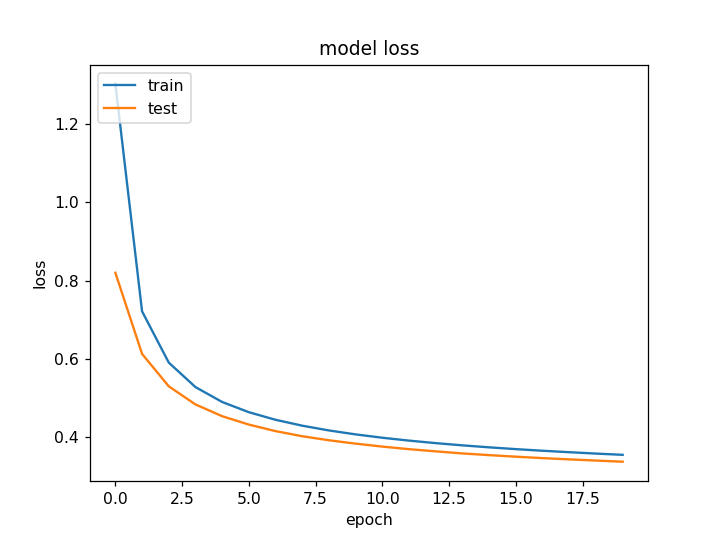

In [79]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


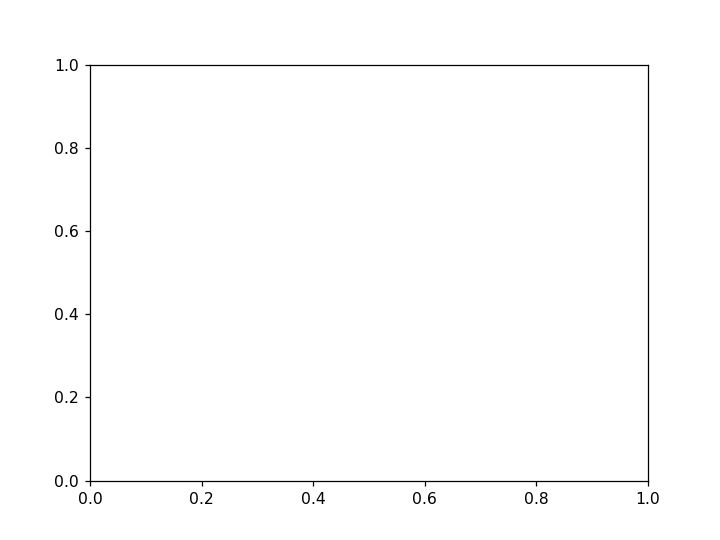

In [82]:
fig, ax = plt.subplots(1,1)
fig.canvas.flush_events()

<IPython.core.display.Javascript object>


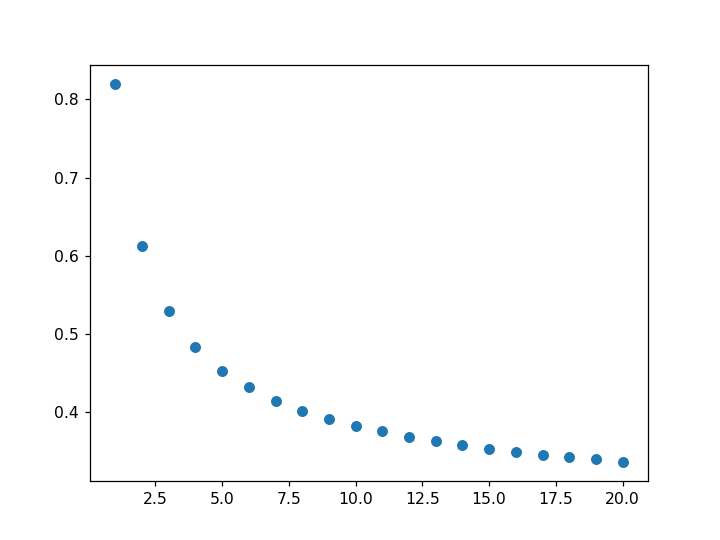

In [77]:
plt.scatter(x,vy)

Test Score 0.33714812994003296
Test Accuracy 0.9064000248908997


<IPython.core.display.Javascript object>


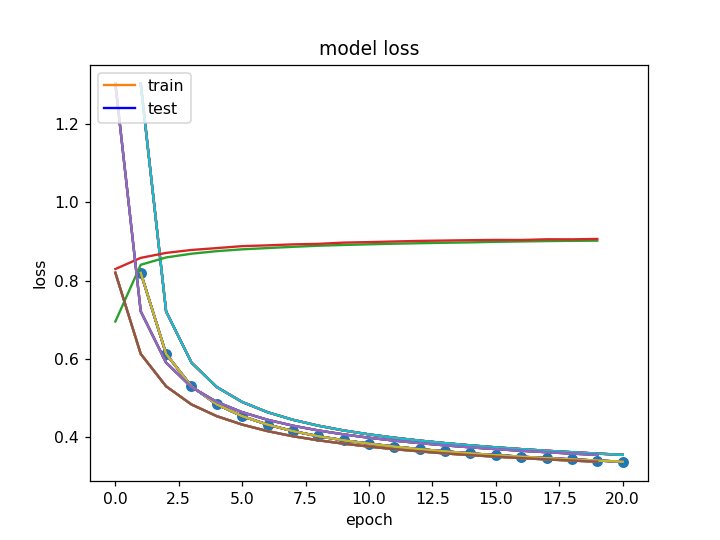

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

In [56]:
# ax.set_xlabel('epoch');
# ax.set_ylabel('Categorical Crossentropy Loss')

#List the epoc numbers
x=list(range(1, nb_epoch+1))

vy=history.history['val loss']
ty=history.history['loss'] 
plt_dynamic (x,uy,ty,ax)


In [16]:
# multilayer perceptron
model_sigmoid=Sequential()
model_sigmoid.add(Dense(512,activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim,activation='softmax'))
model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, 
                                                                                                                  Y_test))

Epoch 1/20
469/469 [==============================] - 7s 12ms/step - loss: 2.2639 - accuracy: 0.2352 - val_loss: 2.2195 - val_accuracy: 0.3295
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 2.1782 - accuracy: 0.4676 - val_loss: 2.1248 - val_accuracy: 0.6281
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 2.0665 - accuracy: 0.5978 - val_loss: 1.9876 - val_accuracy: 0.6591
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 1.9056 - accuracy: 0.6449 - val_loss: 1.7950 - val_accuracy: 0.6970
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 1.6926 - accuracy: 0.6758 - val_loss: 1.5617 - val_accuracy: 0.7122
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 1.4607 - accuracy: 0.7064 - val_loss: 1.3337 - val_accuracy: 0.7366
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 1.2527 - accuracy: 0.7342 - val_loss: 1.1461 - val_accuracy: 0.7545
Epoch

<IPython.core.display.Javascript object>


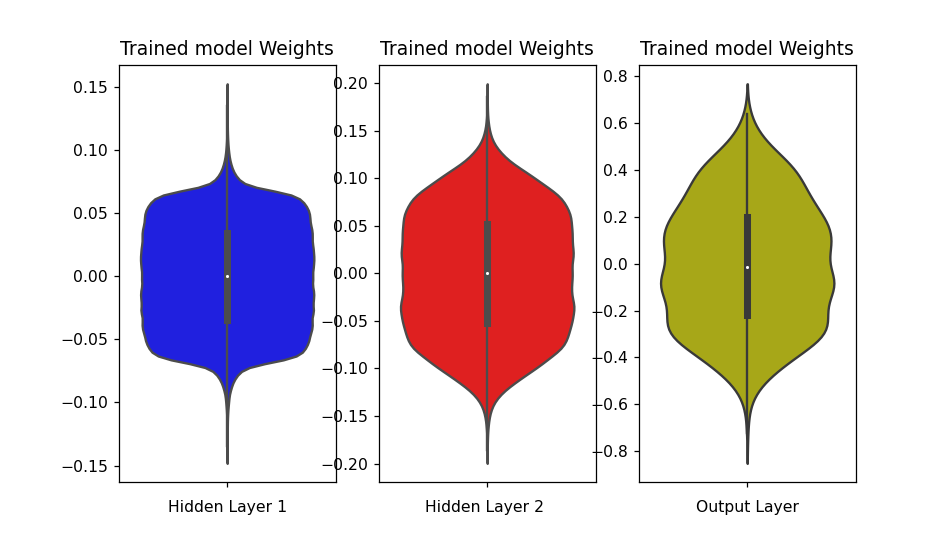

In [18]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot (1, 3, 1)
plt.title("Trained model Weights") 
ax = sns.violinplot (y=h1_w, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot (1, 3, 2)
plt.title("Trained model Weights") 
ax = sns.violinplot (y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot (1, 3, 3)
plt.title("Trained model Weights") 
ax = sns.violinplot (y=out_w,color='y')
plt.xlabel('Output Layer')
plt.show()